# Our database with companies that left Russia in 2022

### База Тиграна с Action, Tone + База старая с INT  + Spark

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from kmodes.kprototypes import KPrototypes

In [2]:
df_int = pd.read_csv("database new.csv")
df_actions_tone = pd.read_csv("new database with Actions.csv")
spark = pd.read_csv("spark.csv", delimiter=';')

In [3]:
df_int.shape

(2023, 5)

In [4]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_int.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 i             1
Action       37
Industry    548
Country     238
ИНН         915
dtype: int64


In [5]:
df_actions_tone.shape

(3344, 6)

In [6]:
df_actions_tone = df_actions_tone.drop('Unnamed: 0', axis = 1)
df_actions_tone = df_actions_tone.rename(columns = {'tone': 'Tone'})
df_actions_tone = df_actions_tone.sort_values(by='Company')
df_actions_tone = df_actions_tone.reset_index(drop=True)
df_actions_tone.head(1)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,2


In [7]:
# Define a dictionary to map the numbers to their corresponding labels
label_mapping = {0: 'leaved', 1: 'continue', 2: 'paused'}

# Replace the numbers in the specified column with the labels
df_actions_tone['Tone'] = df_actions_tone['Tone'].map(label_mapping)

In [8]:
df_actions_tone.head(10)

,Company,Action,Industry,Country,Tone
0,1840 & Company,"['suspend', 'aesthetics', 'operations', ',', '...",Health Care,United States,paused
1,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused
2,1xBet,"['ending', 'new', 'investments', 'where', 'has...",Financials,Netherlands,leaved
3,3HC Semiconductors,"['some', 'clients', 'no', 'longer', 'supplied'...",Materials,France,leaved
4,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue
5,3M Company,"['suspend', 'new', 'investments', 'and', 'new'...",Health Care,Switzerland,paused
6,A&D,"['cease', 'trading', 'operations', 'with', 'ru...",Industrials,Germany,leaved
7,A-SAFE,"['still', 'operating', 'in', 'russia', ';', 's...",Information Technology,Australia,leaved
8,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved
9,AB InBev,"['continues', 'flows', 'to', 'russian', 'and',...",Industrials,France,leaved


In [9]:
df_int = df_int.rename(columns={'i': 'Company'})
df_int = df_int.rename(columns={'ИНН': 'INT'})
df_int = df_int.sort_values(by='Company')
df_int = df_int.reset_index(drop=True)
df_int.head(1)

,Company,Action,Industry,Country,INT
0,1Password,1Password приостановил деятельность на террито...,NaN,Канада,NaN


In [10]:
df1 = df_actions_tone.copy()
df2 = df_int.copy()

# Merge the two datasets based on the "Company" column
data = pd.merge(df1, df2, on='Company')
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,Action_y,Industry_y,Country_y,INT
0,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused,1Password приостановил деятельность на террито...,NaN,Канада,NaN


In [11]:
# Select the desired columns
desired_columns = ['Company', 'Action_x', 'Industry_x', 'Country_x', 'Tone', 'INT']
data = data[desired_columns]
data.head(1)

,Company,Action_x,Industry_x,Country_x,Tone,INT
0,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused,NaN


In [12]:
# Rename the columns
data.columns = ['Company', 'Action', 'Industry', 'Country', 'Tone', 'INT']

In [13]:
data

,Company,Action,Industry,Country,Tone,INT
0,1Password,"['suspend', 'new', 'investments/development']",Consumer Discretionary,France,paused,NaN
1,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue,1.646033e+09
2,3M Company,"['suspend', 'new', 'investments', 'and', 'new'...",Health Care,Switzerland,paused,1.646033e+09
3,AAK,"['suspended', 'some', 'shipments']",Information Technology,Japan,leaved,7.703100e+09
4,AB InBev,"['continues', 'flows', 'to', 'russian', 'and',...",Industrials,France,leaved,5.020038e+09
...,...,...,...,...,...,...
1656,Формула-1 (Formula-1),"['suspend', 'new', 'investments', 'and', 'clin...",Health Care,United States,paused,5.410070e+09
1657,"Французский автомобильный концерн Re...""","['no', 'new', 'investments']",Utilities,France,leaved,NaN
1658,Шальке,"['no', 'new', 'business']",Industrials,Denmark,leaved,NaN
1659,Эвертон,"['stopped', 'renewing', 'and', 'underwriting',...",Financials,United States,leaved,5.012019e+09


# Spark database

In [14]:
spark.head()

,№,Наименование,Регистрационный номер,Наименование на английском,Краткое наименование,Дата регистрации,"Возраст компании, лет",Код налогоплательщика,Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,1,"3М ВОЛГА, ООО",1.121674e+12,"3M VOLGA, OOO","ООО""3М ВОЛГА""",16.08.2012,"10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,2,"CCC, ООО",1.198617e+12,"OOO C, CJSC","ООО ""CCC""",18.06.2019,"3,5",8608060872,Строительство инженерных коммуникаций для водо...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,65 126 000,47 022 000,NaN,NaN,-381 000,8 130 000,213 000
2,3,"WIX-SZ, ООО",1.133538e+12,"WIX-SZ, OOO","ООО ""WIX-SZ""",12.02.2013,"10,0",3526030067,"Работы строительные специализированные прочие,...",Общества с ограниченной ответственностью,...,18 049 000,11 592 000,5 157 000,11 399 000,15 481 000,558 000,548 000,279 000,422 000,543 000
3,4,"А.С. ГРУПП, ООО",1.192375e+12,"A.S. GROUP, LLC","ООО ""А.С. ГРУПП""",16.04.2019,"4,0",2310213891,Консультирование по вопросам коммерческой деят...,Общества с ограниченной ответственностью,...,NaN,NaN,1 586 000,5 833 000,NaN,NaN,NaN,-2 667 000,-914 000,NaN
4,5,"АББ, ООО",1.027739e+12,"ABB, OOO","ООО ""АББ""",13.12.2000,"22,0",7727180430,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000


In [15]:
spark.shape

(796, 28)

<span style="font-size: 17px;"> Delete all unnecessary columns

In [16]:
columns_to_drop = ['№', 'Наименование', 'Регистрационный номер', 'Краткое наименование', 'Дата регистрации']
spark = spark.drop(columns_to_drop, axis=1)

In [17]:
print(spark.columns)

Index(['Наименование на английском', 'Возраст компании, лет',
       'Код налогоплательщика', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', '2017, Среднесписочная численность работников',
       '2018, Среднесписочная численность работников',
       '2019, Среднесписочная численность работников',
       '2020, Среднесписочная численность работников',
       '2021, Среднесписочная численность работников', 'Мои списки',
       '2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB',
       '2020, Выручка, RUB', '2021, Выручка, RUB',
       '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB'],
      dtype='object')


<span style="font-size: 17px;"> Rename columns 'Наименование на английском' and 'Код налогоплательщика' to 'Company' and 'INT'

In [18]:
spark = spark.rename(columns={"Наименование на английском": "Company"})
spark = spark.rename(columns={"Код налогоплательщика": "INT"})
# spark['Company'] = spark['Company'].str.lower()

In [19]:
spark.head(1)

,Company,"Возраст компании, лет",INT,Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2019, Среднесписочная численность работников",...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO","10,5",1646033450,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,4,8,7,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000


# Merging two databases into one

In [20]:
df_merged = data.merge(spark, on='INT')

In [21]:
df_merged.head()

,Company_x,Action,Industry,Country,Tone,INT,Company_y,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,...,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,3M,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",Industrials,Netherlands,continue,1.646033e+09,"3M VOLGA, OOO","10,5",Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,3M Company,"['suspend', 'new', 'investments', 'and', 'new'...",Health Care,Switzerland,paused,1.646033e+09,"3M VOLGA, OOO","10,5",Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,...,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
2,AB InBev,"['continues', 'flows', 'to', 'russian', 'and',...",Industrials,France,leaved,5.020038e+09,"AB INBEV EFES, AO","19,0",Производство пива,Непубличные акционерные общества,...,28 651 322 000,31 060 258 000,66 010 719 000,76 884 209 000,85 384 921 000,-5 513 654 000,-1 349 304 000,225 182 000,2 854 523 000,5 338 806 000
3,ABB,"['suspend', 'new', 'investments', 'and', '``',...",Consumer Discretionary,France,paused,7.727180e+09,"ABB, OOO","22,0",Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,...,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000
4,ACCA,"['suspend', 'new', 'investment', 'in', 'russia']",Industrials,France,paused,6.449104e+09,"ASSA GRUPP, OOO UK CHPP","0,5",Управление эксплуатацией нежилого фонда за воз...,Общества с ограниченной ответственностью,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_merged = df_merged.rename(columns={"Company_y": "Company"})

df_merged = df_merged.drop({'Company_x', 'INT', 
                          '2017, Среднесписочная численность работников', 
                          '2018, Среднесписочная численность работников', 
                          '2019, Среднесписочная численность работников',
                          '2020, Среднесписочная численность работников', 
                          '2021, Среднесписочная численность работников',
                          'Мои списки'}, axis=1)

In [23]:
df_merged = df_merged[['Company', 'Industry', 'Country', 'Action', 'Tone', 'Возраст компании, лет',
       'Вид деятельности/отрасль', 'Организационно-правовая форма',
       'Форма собственности', 'Размер компании', '2017, Выручка, RUB',
       '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB',
       '2021, Выручка, RUB', '2017, Прибыль (убыток) до налогообложения , RUB',
       '2018, Прибыль (убыток) до налогообложения , RUB',
       '2019, Прибыль (убыток) до налогообложения , RUB',
       '2020, Прибыль (убыток) до налогообложения , RUB',
       '2021, Прибыль (убыток) до налогообложения , RUB']]

In [24]:
df_merged.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,"10,5",Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
1,"3M VOLGA, OOO",Health Care,Switzerland,"['suspend', 'new', 'investments', 'and', 'new'...",paused,"10,5",Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,13 300 000,104 722 000,218 916 000,19 484 000,153 458 000,-154 449 000,-147 371 000,-135 529 000,-196 685 000,-172 832 000
2,"AB INBEV EFES, AO",Industrials,France,"['continues', 'flows', 'to', 'russian', 'and',...",leaved,"19,0",Производство пива,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,28 651 322 000,31 060 258 000,66 010 719 000,76 884 209 000,85 384 921 000,-5 513 654 000,-1 349 304 000,225 182 000,2 854 523 000,5 338 806 000
3,"ABB, OOO",Consumer Discretionary,France,"['suspend', 'new', 'investments', 'and', '``',...",paused,"22,0",Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,21 012 268 000,23 143 045 000,22 362 311 000,23 544 957 000,23 339 744 000,1 908 551 000,1 011 902 000,1 142 817 000,-33 797 000,1 555 765 000
4,"ASSA GRUPP, OOO UK CHPP",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,"0,5",Управление эксплуатацией нежилого фонда за воз...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
database = df_merged.copy()

<span style="font-size: 17px;"> The column 'Возраст компании, лет' is of string datatype. To make it float datatype, we replace , with . 

In [26]:
if database['Возраст компании, лет'].dtype == object:
        # Replace commas with periods in the column
        database['Возраст компании, лет'] = database['Возраст компании, лет'].str.replace(',', '.')
database['Возраст компании, лет'] = database['Возраст компании, лет'].astype(float)

<span style="font-size: 17px;"> Some columns has big number with spaces, therefore they are of a string type.  To make them float datatype, we delete all unnecassary spaces

In [27]:
database['2017, Выручка, RUB'] = database['2017, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2018, Выручка, RUB'] = database['2018, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2019, Выручка, RUB'] = database['2019, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2020, Выручка, RUB'] = database['2020, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2021, Выручка, RUB'] = database['2021, Выручка, RUB'].str.replace(' ', '').astype(float)
database['2017, Прибыль (убыток) до налогообложения , RUB'] = database['2017, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2018, Прибыль (убыток) до налогообложения , RUB'] = database['2018, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2019, Прибыль (убыток) до налогообложения , RUB'] = database['2019, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2020, Прибыль (убыток) до налогообложения , RUB'] = database['2020, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)
database['2021, Прибыль (убыток) до налогообложения , RUB'] = database['2021, Прибыль (убыток) до налогообложения , RUB'].str.replace(' ', '').astype(float)

In [28]:
database.head(5)

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Выручка, RUB","2018, Выручка, RUB","2019, Выручка, RUB","2020, Выручка, RUB","2021, Выручка, RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB"
0,"3M VOLGA, OOO",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.330000e+07,1.047220e+08,2.189160e+08,1.948400e+07,1.534580e+08,-1.544490e+08,-1.473710e+08,-1.355290e+08,-1.966850e+08,-1.728320e+08
1,"3M VOLGA, OOO",Health Care,Switzerland,"['suspend', 'new', 'investments', 'and', 'new'...",paused,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.330000e+07,1.047220e+08,2.189160e+08,1.948400e+07,1.534580e+08,-1.544490e+08,-1.473710e+08,-1.355290e+08,-1.966850e+08,-1.728320e+08
2,"AB INBEV EFES, AO",Industrials,France,"['continues', 'flows', 'to', 'russian', 'and',...",leaved,19.0,Производство пива,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,2.865132e+10,3.106026e+10,6.601072e+10,7.688421e+10,8.538492e+10,-5.513654e+09,-1.349304e+09,2.251820e+08,2.854523e+09,5.338806e+09
3,"ABB, OOO",Consumer Discretionary,France,"['suspend', 'new', 'investments', 'and', '``',...",paused,22.0,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.101227e+10,2.314304e+10,2.236231e+10,2.354496e+10,2.333974e+10,1.908551e+09,1.011902e+09,1.142817e+09,-3.379700e+07,1.555765e+09
4,"ASSA GRUPP, OOO UK CHPP",Industrials,France,"['suspend', 'new', 'investment', 'in', 'russia']",paused,0.5,Управление эксплуатацией нежилого фонда за воз...,Общества с ограниченной ответственностью,Частная собственность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
database.shape

(703, 20)

# Handling missing values

# Сделать прибыль и выручку из средних за все года

<span style="font-size: 17px;"> Count total NaN at each column in a database

In [30]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                              0
Industry                                             0
Country                                              0
Action                                               0
Tone                                                 0
Возраст компании, лет                                0
Вид деятельности/отрасль                             0
Организационно-правовая форма                        0
Форма собственности                                  0
Размер компании                                    128
2017, Выручка, RUB                                 205
2018, Выручка, RUB                                 182
2019, Выручка, RUB                                 166
2020, Выручка, RUB                                 162
2021, Выручка, RUB                                 168
2017, Прибыль (убыток) до налогообложения , RUB    180
2018, Прибыль (убыток) до налогообложения , RUB    164
2019, Прибыл

<span style="font-size: 17px;"> Visualize missing values in dataset

In [31]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<span style="font-size: 17px;"> Visualize the number of missing values as a bar chart

<AxesSubplot:>

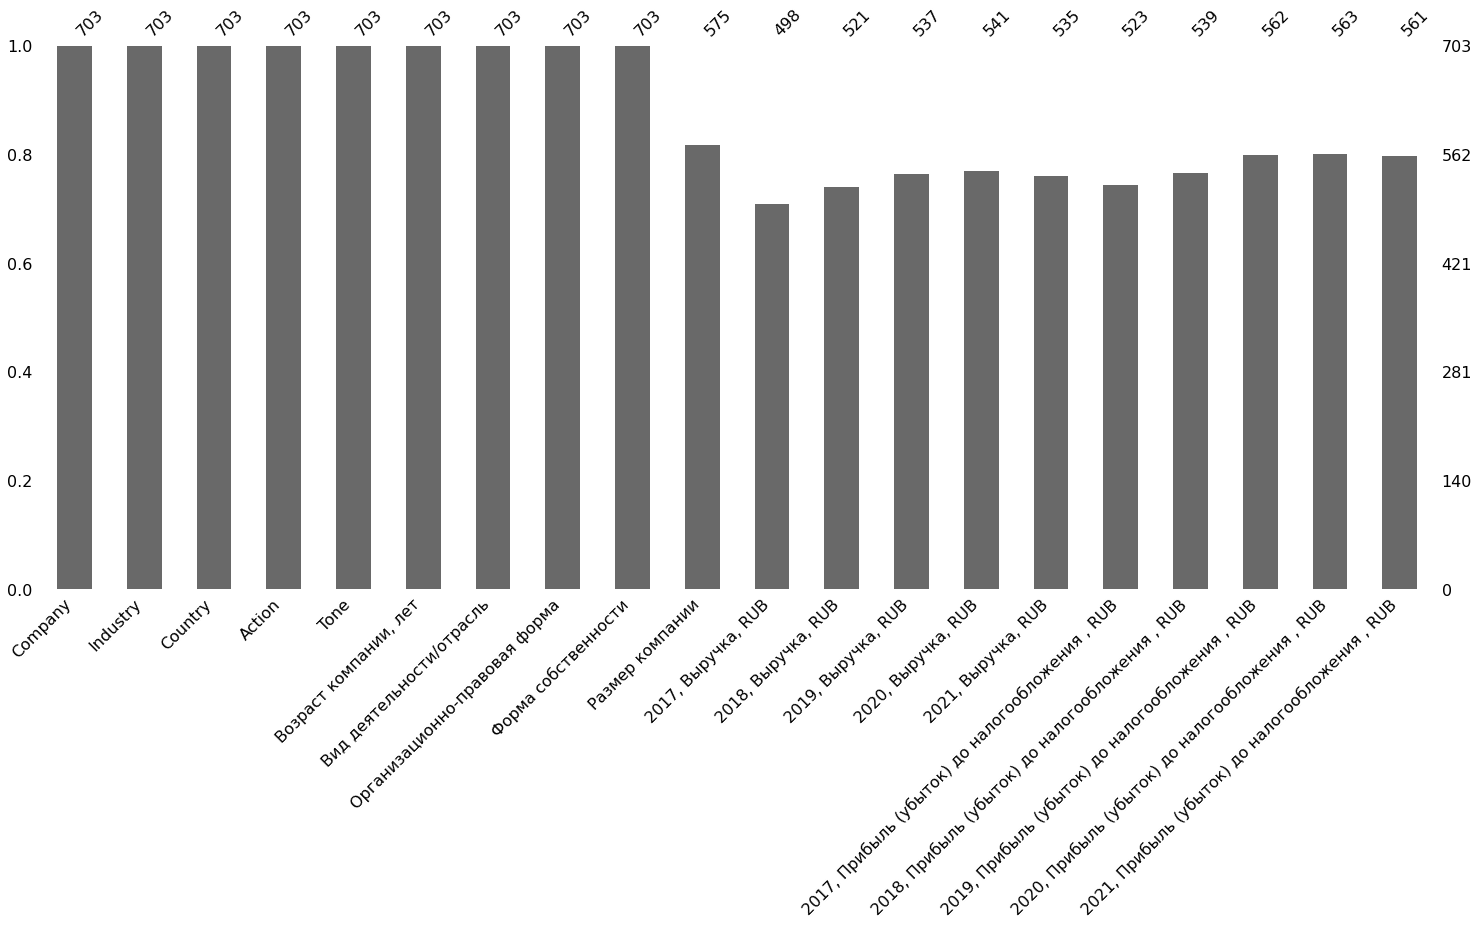

In [32]:
import missingno as msno
msno.bar(database)

<span style="font-size: 17px;"> Visualize the correlation between the number of missing values in different columns as a heatmap.

<span style="font-size: 17px;"> As we see below, there is a diagonal with values 0.9, which means that profit and insome highly correlates in terms of null values (if profit value is present, then income value is likely to be present too)

<AxesSubplot:>

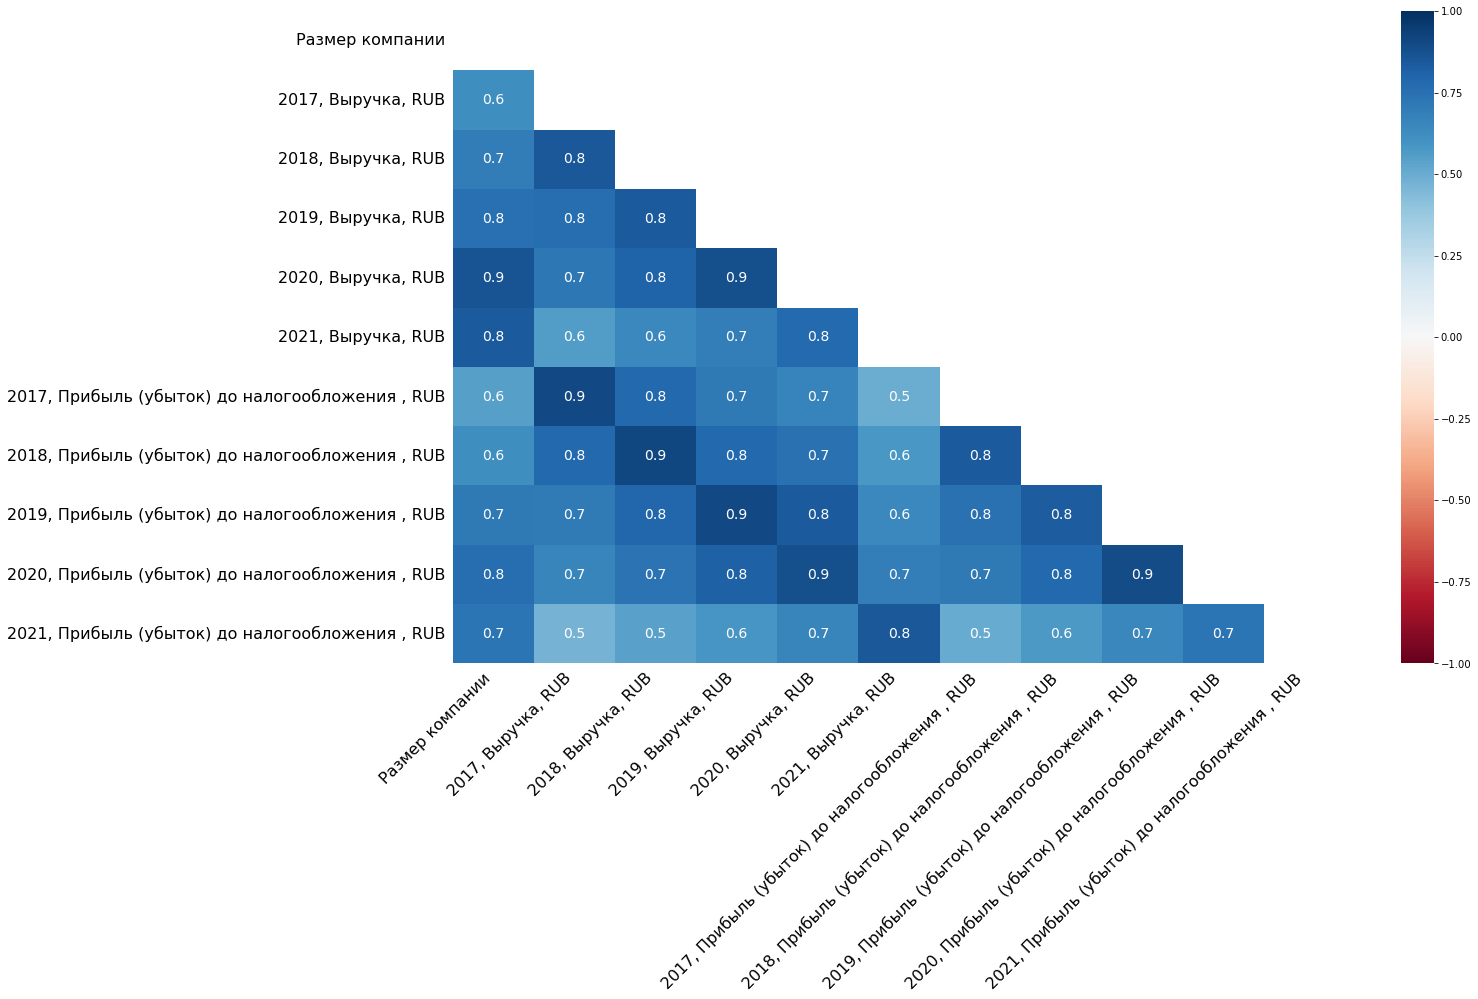

In [33]:
msno.heatmap(database)

# Here we have to fill NaN values of proft with mean !!!!!

<span style="font-size: 17px;"> Delete all rows where more than 6 NaN values exist

In [34]:
database.dropna(thresh=database.shape[1] - 6, inplace=True)

In [35]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                    17
2017, Выручка, RUB                                 70
2018, Выручка, RUB                                 45
2019, Выручка, RUB                                 29
2020, Выручка, RUB                                 22
2021, Выручка, RUB                                 50
2017, Прибыль (убыток) до налогообложения , RUB    53
2018, Прибыль (убыток) до налогообложения , RUB    33
2019, Прибыль (убыток) до нал

In [36]:
database.shape

(562, 20)

<span style="font-size: 17px;"> Delete all rows where Nan values exist

In [37]:
database['Mean Revenue'] = database[['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB']].mean(axis=1)

In [38]:
database.dropna(subset=['Mean Revenue'], inplace=True)
database.drop(['2017, Выручка, RUB', '2018, Выручка, RUB', '2019, Выручка, RUB', '2020, Выручка, RUB', '2021, Выручка, RUB'], axis=1, inplace=True)


In [39]:
database.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,"2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2020, Прибыль (убыток) до налогообложения , RUB","2021, Прибыль (убыток) до налогообложения , RUB",Mean Revenue
0,"3M VOLGA, OOO",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,-1.544490e+08,-1.473710e+08,-1.355290e+08,-1.966850e+08,-1.728320e+08,1.019760e+08
1,"3M VOLGA, OOO",Health Care,Switzerland,"['suspend', 'new', 'investments', 'and', 'new'...",paused,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,-1.544490e+08,-1.473710e+08,-1.355290e+08,-1.966850e+08,-1.728320e+08,1.019760e+08
2,"AB INBEV EFES, AO",Industrials,France,"['continues', 'flows', 'to', 'russian', 'and',...",leaved,19.0,Производство пива,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,-5.513654e+09,-1.349304e+09,2.251820e+08,2.854523e+09,5.338806e+09,5.759829e+10
3,"ABB, OOO",Consumer Discretionary,France,"['suspend', 'new', 'investments', 'and', '``',...",paused,22.0,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,1.908551e+09,1.011902e+09,1.142817e+09,-3.379700e+07,1.555765e+09,2.268046e+10
5,"LERUA MERLEN VOSTOK, OOO",Consumer Staples,United States,"['suspend', 'shipments', 'into', 'russia', 'bu...",paused,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,7.438949e+09,5.463514e+09,1.089139e+10,7.543007e+09,4.471916e+10,3.235489e+11


In [40]:
database.shape

(553, 16)

In [41]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                                             0
Industry                                            0
Country                                             0
Action                                              0
Tone                                                0
Возраст компании, лет                               0
Вид деятельности/отрасль                            0
Организационно-правовая форма                       0
Форма собственности                                 0
Размер компании                                     9
2017, Прибыль (убыток) до налогообложения , RUB    53
2018, Прибыль (убыток) до налогообложения , RUB    33
2019, Прибыль (убыток) до налогообложения , RUB     8
2020, Прибыль (убыток) до налогообложения , RUB     9
2021, Прибыль (убыток) до налогообложения , RUB    37
Mean Revenue                                        0
dtype: int64


In [42]:
database['Mean Profit'] = database[['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB']].mean(axis=1)

In [43]:
database.dropna(subset=['Mean Revenue'], inplace=True)
database.drop(['2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB', '2019, Прибыль (убыток) до налогообложения , RUB', '2020, Прибыль (убыток) до налогообложения , RUB', '2021, Прибыль (убыток) до налогообложения , RUB'], axis=1, inplace=True)

In [44]:
database.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"3M VOLGA, OOO",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
1,"3M VOLGA, OOO",Health Care,Switzerland,"['suspend', 'new', 'investments', 'and', 'new'...",paused,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
2,"AB INBEV EFES, AO",Industrials,France,"['continues', 'flows', 'to', 'russian', 'and',...",leaved,19.0,Производство пива,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,5.759829e+10,3.111106e+08
3,"ABB, OOO",Consumer Discretionary,France,"['suspend', 'new', 'investments', 'and', '``',...",paused,22.0,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.268046e+10,1.117048e+09
5,"LERUA MERLEN VOSTOK, OOO",Consumer Staples,United States,"['suspend', 'shipments', 'into', 'russia', 'bu...",paused,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10


In [45]:
database.shape

(553, 12)

In [46]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  9
Mean Revenue                     0
Mean Profit                      0
dtype: int64


In [47]:
database.dropna(inplace=True)

In [48]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Company                          0
Industry                         0
Country                          0
Action                           0
Tone                             0
Возраст компании, лет            0
Вид деятельности/отрасль         0
Организационно-правовая форма    0
Форма собственности              0
Размер компании                  0
Mean Revenue                     0
Mean Profit                      0
dtype: int64


In [49]:
database.shape

(544, 12)

In [50]:
database.describe()

,"Возраст компании, лет",Mean Revenue,Mean Profit
count,544.000000,5.440000e+02,5.440000e+02
mean,16.699449,4.908873e+10,4.842843e+09
std,7.156127,4.343776e+11,4.582772e+10
min,3.000000,1.535000e+05,-4.494637e+09
25%,11.500000,1.293917e+08,1.314750e+06
50%,16.500000,1.712713e+09,7.868090e+07
75%,21.000000,1.037080e+10,5.768164e+08
max,46.000000,6.223526e+12,9.189216e+11


In [51]:
database.corr()

,"Возраст компании, лет",Mean Revenue,Mean Profit
"Возраст компании, лет",1.000000,0.141202,0.141609
Mean Revenue,0.141202,1.000000,0.799089
Mean Profit,0.141609,0.799089,1.000000


<span style="font-size: 17px;">  Now our dataset has no NaN values and we can start clustarisation

# Clusterisation (k-prototypes)

Если мы оставляем колонку 'Mean Profit', то получается 1 кластер

Если мы удаляем колонку 'Mean Revenue' and 'Mean Profit', то получается 2 кластера: 
0 : 326 и 1 : 218

In [52]:
database2 = database.copy()
database2 = database2.drop({'Company', 'Action', 'Вид деятельности/отрасль','Организационно-правовая форма'} , axis = 1)
# database2 = database2.drop({'Company', 'Action','Вид деятельности/отрасль', 'Организационно-правовая форма','Форма собственности'} , axis = 1)

In [53]:
database2.head(5)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,Industrials,Netherlands,continue,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
1,Health Care,Switzerland,paused,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
2,Industrials,France,leaved,19.0,Совместная частная и иностранная собственность,Крупные предприятия,5.759829e+10,3.111106e+08
3,Consumer Discretionary,France,paused,22.0,Собственность иностранных юридических лиц,Крупные предприятия,2.268046e+10,1.117048e+09
5,Consumer Staples,United States,paused,19.5,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10


In [54]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [55]:
mark_array=database2.values

<span style="font-size: 17px;"> Mark columns that has float datatypes

In [56]:
mark_array[:, 3] = mark_array[:, 3].astype(float)
# mark_array[:, 5] = mark_array[:, 5].astype(float)
# mark_array[:, 6] = mark_array[:, 6].astype(float)
# mark_array[:, 8] = mark_array[:, 8].astype(float)
# mark_array[:, 9] = mark_array[:, 9].astype(float)

In [57]:
mark_array

array([['Industrials', 'Netherlands', 'continue', ...,
        'Малые предприятия', 101976000.0, -161373200.0],
       ['Health Care', 'Switzerland', 'paused', ..., 'Малые предприятия',
        101976000.0, -161373200.0],
       ['Industrials', 'France', 'leaved', ..., 'Крупные предприятия',
        57598285800.0, 311110600.0],
       ...,
       ['Consumer Staples', 'France', 'continue', ...,
        'Микропредприятия', 13160000.0, 522400.0],
       ['Health Care', 'United States', 'paused', ...,
        'Микропредприятия', 10739000.0, -3348750.0],
       ['Financials', 'United States', 'leaved', ..., 'Микропредприятия',
        2302000.0, -180500.0]], dtype=object)

<span style="font-size: 17px;"> Get the position of categorical columns

In [58]:
catColumnsPos = [database2.columns.get_loc(col) for col in list(database2.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(database2.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Industry', 'Country', 'Tone', 'Форма собственности', 'Размер компании']
Categorical columns position  : [0, 1, 2, 4, 5]


In [59]:
# Convert dataframe to matrix
dfMatrix = database2.to_numpy()

In [60]:
dfMatrix 

array([['Industrials', 'Netherlands', 'continue', ...,
        'Малые предприятия', 101976000.0, -161373200.0],
       ['Health Care', 'Switzerland', 'paused', ..., 'Малые предприятия',
        101976000.0, -161373200.0],
       ['Industrials', 'France', 'leaved', ..., 'Крупные предприятия',
        57598285800.0, 311110600.0],
       ...,
       ['Consumer Staples', 'France', 'continue', ...,
        'Микропредприятия', 13160000.0, 522400.0],
       ['Health Care', 'United States', 'paused', ...,
        'Микропредприятия', 10739000.0, -3348750.0],
       ['Financials', 'United States', 'leaved', ..., 'Микропредприятия',
        2302000.0, -180500.0]], dtype=object)

In [61]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", database2.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 Industry                 0
Country                  0
Tone                     0
Возраст компании, лет    0
Форма собственности      0
Размер компании          0
Mean Revenue             0
Mean Profit              0
dtype: int64


<span style="font-size: 17px;"> Elbow method to detect number of clusters K

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


<function matplotlib.pyplot.show(close=None, block=None)>

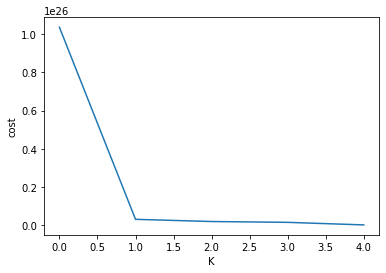

In [62]:
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(database2, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [63]:
cost

[1.0359577581091819e+26,
 3.192327294838433e+24,
 2.0498698107736903e+24,
 1.616789825694481e+24,
 2.723436302487909e+23]

In [64]:
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 2, 4, 5, 6])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/30, moves: 107, ncost: 4.544832494310482e+23
Run: 1, iteration: 2/30, moves: 3, ncost: 3.483558152154459e+23
Run: 1, iteration: 3/30, moves: 1, ncost: 3.361294939812874e+23
Run: 1, iteration: 4/30, moves: 0, ncost: 3.361294939812874e+23
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/30, moves: 7, ncost: 3.483558152154459e+23
Run: 2, iteration: 2/30, moves: 1, ncost: 3.361294939812874e+23
Run: 2, iteration: 3/30, moves: 0, ncost: 3.361294939812874e+23
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/30, moves: 49, ncost: 3.808182263861867e+23
Run: 3, iteration: 2/30, moves: 1, ncost: 3.483558152154459e+23
Run: 3, iteration: 3/30, moves: 1, ncost: 3.361294939812874e+23
Run: 3, iteration: 4/30, moves: 0, ncost:

In [65]:
print(kproto.cluster_centroids_)

[['28.125' '451596233300.0' 'Air Transportation' 'Denmark' 'paused'
  'Частная собственность' 'Крупные предприятия' '6223526293400.0']
 ['16.614814814814814' '1533558813.559136' 'Industrials' 'USA' 'leaved'
  'Собственность иностранных юридических лиц' 'Крупные предприятия'
  '4213068000.0']]


In [66]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [67]:
cluster_dict

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [68]:
database2['cluster']=cluster_dict

In [69]:
for i in range(0,5):
    print(i, ": ", database2[database2['cluster']== i].value_counts().sum())

0 :  4
1 :  540
2 :  0
3 :  0
4 :  0


In [70]:
database2

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
0,Industrials,Netherlands,continue,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08,1
1,Health Care,Switzerland,paused,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08,1
2,Industrials,France,leaved,19.0,Совместная частная и иностранная собственность,Крупные предприятия,5.759829e+10,3.111106e+08,1
3,Consumer Discretionary,France,paused,22.0,Собственность иностранных юридических лиц,Крупные предприятия,2.268046e+10,1.117048e+09,1
5,Consumer Staples,United States,paused,19.5,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10,1
...,...,...,...,...,...,...,...,...,...
694,Energy,Canada,paused,9.5,Иная смешанная российская собственность,Микропредприятия,3.572000e+06,1.735000e+05,1
695,Consumer Staples,Italy,continue,6.5,Иная смешанная российская собственность,Микропредприятия,7.519332e+05,-1.719114e+05,1
697,Consumer Staples,France,continue,30.5,Собственность общественных объединений,Микропредприятия,1.316000e+07,5.224000e+05,1
701,Health Care,United States,paused,5.5,Частная собственность,Микропредприятия,1.073900e+07,-3.348750e+06,1


In [71]:
database2[database2['cluster']== 0].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
94,Consumer Discretionary,Denmark,paused,27.0,Частная собственность,Крупные предприятия,6.223526e+12,3.105514e+11,0
95,Industrial Equipment,Sweden,paused,27.0,Частная собственность,Крупные предприятия,6.223526e+12,3.105514e+11,0
597,Air Transportation,USA,leaved,28.5,Совместная частная и иностранная собственность,Крупные предприятия,5.548022e+11,2.663605e+11,0
691,Materials,United States,continue,30.0,Смешанная российская собственность с долей фед...,Крупные предприятия,4.940345e+12,9.189216e+11,0


In [72]:
database2[database2['cluster']== 1].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster
0,Industrials,Netherlands,continue,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08,1
1,Health Care,Switzerland,paused,10.5,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08,1
2,Industrials,France,leaved,19.0,Совместная частная и иностранная собственность,Крупные предприятия,5.759829e+10,3.111106e+08,1
3,Consumer Discretionary,France,paused,22.0,Собственность иностранных юридических лиц,Крупные предприятия,2.268046e+10,1.117048e+09,1
5,Consumer Staples,United States,paused,19.5,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10,1
6,Industrials,Germany,leaved,22.0,Собственность иностранных юридических лиц,Средние предприятия,1.558005e+09,9.890000e+07,1
7,Industrials,Switzerland,leaved,23.0,Частная собственность,Микропредприятия,8.999000e+06,-2.249400e+06,1
8,Consumer Discretionary,Netherlands,paused,20.5,Собственность иностранных юридических лиц,Крупные предприятия,1.360063e+10,2.193090e+09,1
9,Materials,Finland,leaved,16.5,Собственность иностранных юридических лиц,Крупные предприятия,6.983766e+09,6.535042e+08,1
10,Consumer Discretionary,India,paused,16.5,Собственность иностранных юридических лиц,Крупные предприятия,6.983766e+09,6.535042e+08,1


In [73]:
database2[database2['cluster']== 2].head(10)

,Industry,Country,Tone,"Возраст компании, лет",Форма собственности,Размер компании,Mean Revenue,Mean Profit,cluster


<span style="font-size: 17px;"> Visualisation:

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

database2.columns = ["Action", "Tone", "Возраст компании, лет", "Вид деятельности/отрасль", "Организационно-правовая форма", "Форма собственности", "cluster"]
sns.pairplot(database2, hue="cluster")

ValueError: Length mismatch: Expected axis has 9 elements, new values have 7 elements

In [ ]:
sns.boxplot(x="cluster", y="Возраст компании, лет", data=database2)


In [ ]:
sns.boxplot(x="cluster", y="Организационно-правовая форма", data=database2)

In [ ]:
sns.boxplot(x="cluster", y="Форма собственности", data=database2)

## Clusterisation of dataset with income and profit

In [ ]:
df_filtered = database.copy()
df_filtered = df_filtered.drop({'Company', 'Action', 'Вид деятельности/отрасль'}, axis=1)

In [ ]:
df_filtered.head(1)

In [ ]:
df_cat = df_filtered[['Industry', 'Country', 'Tone', 'Организационно-правовая форма', 'Форма собственности', 'Размер компании']]

for i in df_cat.columns:
    print(df_cat[i].unique())

In [ ]:
pip install kmodes

<span style="font-size: 17px;"> Check that there are no NaN values in the dataset</span>

In [ ]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", df_filtered.isnull().sum())

In [ ]:
mark_array=df_filtered.values

<span style="font-size: 17px;"> Mark columns that has float datatypes

In [ ]:
mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 7] = mark_array[:, 7].astype(float)
mark_array[:, 8] = mark_array[:, 8].astype(float)
mark_array[:, 9] = mark_array[:, 9].astype(float)
mark_array[:, 10] = mark_array[:, 10].astype(float)
mark_array[:,11] = mark_array[:, 11].astype(float)

<span style="font-size: 17px;"> Get the position of categorical columns

In [ ]:
catColumnsPos = [df_filtered.columns.get_loc(col) for col in list(df_filtered.select_dtypes('object').columns)]

print('Categorical columns           : {}'.format(list(df_filtered.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

In [ ]:
# Convert dataframe to matrix
dfMatrix = df_filtered.to_numpy()

<span style="font-size: 17px;"> Elbow method to detect number of clusters K

In [ ]:
from kmodes.kprototypes import KPrototypes

cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

<span style="font-size: 17px;">  The elbow is at point 3 => numbers of clusters = 3

In [ ]:
mark_array

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2,max_iter=30)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 4, 5, 6])

In [ ]:
print(kproto.cluster_centroids_)

In [ ]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [ ]:
cluster_dict

In [ ]:
df_filtered['Cluster']=cluster_dict

In [ ]:
df_filtered

In [ ]:
df_filtered[df_filtered['Cluster']== 0].head(10)

In [ ]:
df_filtered[df_filtered['Cluster']== 1].head(10)

In [ ]:
df_filtered[df_filtered['Cluster']== 2].head(10)

<span style="font-size: 17px;"> Let's visualize our clusters

In [ ]:
#the volume of each cluster
df_filtered['Cluster'].value_counts().plot(kind='bar')

plt.xticks(fontsize=10, rotation=0, ha='right')

# Graphs

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
database3 = database.copy()
database3

### Countries

<span style="font-size: 17px;"> Value_counts() returns the count of unique values in the 'Country' column, and head(10) selects the first 10 values, which represent the top 10 countries with the highest counts.</span>

In [ ]:
df_countries = database3['Country'].value_counts().head(10)

In [ ]:
df_countries = df_countries.to_frame().reset_index()

In [ ]:
df_countries

In [ ]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_countries.plot(kind='bar', x='index', y='Country', color='pink')

# Set the labels and title
plt.xlabel('Country', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Country', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines (borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Industries:

In [ ]:
df_industries = database3['Industry'].value_counts().head(15)
df_industries = df_industries.to_frame().reset_index()

In [ ]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(16, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_industries.plot(kind='bar', x='index', y='Industry', color='#a7e8a9')

# Set the labels and title
plt.xlabel('Industry', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Industry', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

### Size

In [ ]:
df_size = database3['Размер компании'].value_counts()
df_size = df_size.to_frame().reset_index()

In [ ]:
import matplotlib.pyplot as plt

# Increase the figure size and adjust the spacing
plt.figure(figsize=(14, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_size.plot(kind='bar', x='index', y='Размер компании', color='#b6dffc')

# Set the labels and title
plt.xlabel('Size', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Size', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [ ]:
database3.head()

### Age

In [ ]:
database3['Возраст компании, лет'].plot(kind='hist', bins=30)

plt.xlabel('Age of Company')
plt.ylabel('Count')
plt.title('Distribution of Company Age')

plt.show()

### Organisational form

In [ ]:
df_form = database3['Организационно-правовая форма'].value_counts().head(5)
df_form = df_form.to_frame().reset_index()
df_form

In [ ]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form.plot(kind='bar', x='index', y='Организационно-правовая форма', color='#ccccff')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Organisational form', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Form of property

In [ ]:
df_form2 = database3['Форма собственности'].value_counts().head(5)
df_form2 = df_form2.to_frame().reset_index()
df_form2

In [ ]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_form2.plot(kind='bar', x='index', y='Форма собственности', color='#ffcc99')

# Set the labels and title
plt.xlabel('Type of form', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Form of property', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=45, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Tone
* 0 - completely stoped operations in Russia
* 1 - continue operations in Russia
* 2 - paused operations in Russia

In [ ]:
df_tone = database3['Tone'].value_counts().head(5)
df_tone

In [ ]:
# Increase the figure size and adjust the spacing
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Plot the bar chart
df_tone.plot(kind='bar', x='index', y='Tone', color='#ffcc99')

# Set the labels and title
plt.xlabel('Tone', fontsize=12, labelpad=10)
plt.ylabel('Number of Companies', fontsize=12, labelpad=10)
plt.title('Number of Companies per Tone', fontsize=14, fontweight='bold', pad=20)

# Adjust the font size and rotation of the x-axis labels
plt.xticks(fontsize=10, rotation=0, ha='right')

# Adjust the font size of the y-axis labels
plt.yticks(fontsize=10)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Prediction of Tone

In [75]:
df = database.copy()

In [96]:
df.head()

,Company,Industry,Country,Action,Tone,"Возраст компании, лет",Вид деятельности/отрасль,Организационно-правовая форма,Форма собственности,Размер компании,Mean Revenue,Mean Profit
0,"3M VOLGA, OOO",Industrials,Netherlands,"['suspend', 'supply', 'of', 'parts', 'and', 'd...",continue,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
1,"3M VOLGA, OOO",Health Care,Switzerland,"['suspend', 'new', 'investments', 'and', 'new'...",paused,10.5,Торговля оптовая прочими бытовыми товарами,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Малые предприятия,1.019760e+08,-1.613732e+08
2,"AB INBEV EFES, AO",Industrials,France,"['continues', 'flows', 'to', 'russian', 'and',...",leaved,19.0,Производство пива,Непубличные акционерные общества,Совместная частная и иностранная собственность,Крупные предприятия,5.759829e+10,3.111106e+08
3,"ABB, OOO",Consumer Discretionary,France,"['suspend', 'new', 'investments', 'and', '``',...",paused,22.0,Торговля оптовая производственным электротехни...,Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,2.268046e+10,1.117048e+09
5,"LERUA MERLEN VOSTOK, OOO",Consumer Staples,United States,"['suspend', 'shipments', 'into', 'russia', 'bu...",paused,19.5,"Торговля розничная мебелью, осветительными при...",Общества с ограниченной ответственностью,Собственность иностранных юридических лиц,Крупные предприятия,3.235489e+11,1.521120e+10


In [76]:
df.columns

Index(['Company', 'Industry', 'Country', 'Action', 'Tone',
       'Возраст компании, лет', 'Вид деятельности/отрасль',
       'Организационно-правовая форма', 'Форма собственности',
       'Размер компании', 'Mean Revenue', 'Mean Profit'],
      dtype='object')

### Before predicting, we should check whether variables "Mean Revenue", "Country" and "Industry" are somehow associated with "Tone"

In [77]:
from scipy.stats import chi2_contingency

### "Tone" and "Mean Revenue"

In [78]:
# Create a contingency table between "Tone" and "Mean Revenue"
contingency_table = pd.crosstab(df['Tone'], df['Mean Revenue'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 1075.751067323481
p-value: 0.08029718074555114


The p-value, 0.08029718074555114, represents the statistical significance of the association. In this case, the p-value is above the typical significance level of 0.05, suggesting that there is not enough evidence to reject the null hypothesis of independence. This means that based on the available data, <span style="font-size: 17px;">  we do not have significant evidence to conclude that there is an association between the "Tone" and "Mean Revenue" variables.

### "Tone" and "Country"

In [79]:
# Create a contingency table between "Tone" and "Country"
contingency_table = pd.crosstab(df['Tone'], df['Country'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 237.23605548864396
p-value: 1.0227188469211595e-09


The p-value is extremely small (approximately 1.0227188469211595e-09), which is significantly below the typical significance level of 0.05. This indicates strong evidence to reject the null hypothesis of independence. Therefore, based on the available data, we can conclude that <span style="font-size: 17px;"> there is a significant association between the "Tone" and "Country" variables.

### "Tone" and "Industry"

In [80]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Industry'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 222.86055298290216
p-value: 4.815758757819452e-09


The p-value is extremely small (approximately 4.815758757819452e-09), which is significantly below the typical significance level of 0.05. This provides strong evidence to reject the null hypothesis of independence. Therefore, based on the available data, we can conclude that <span style="font-size: 17px;">  there is a significant association between the "Tone" and "Industry" variables.

### "Tone" and "Age"

In [81]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Возраст компании, лет'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 128.05160821164867
p-value: 0.2093163938141371


<span style="font-size: 17px;"> no dependence

### "Tone" and "Форма собственности"

In [82]:
# Create a contingency table between "Tone" and "Industry"
contingency_table = pd.crosstab(df['Tone'], df['Форма собственности'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 16.244243400833287
p-value: 0.7013608461185201


<span style="font-size: 17px;"> no dependence

### Therefore, we can predict Tone only by Country and by Industry

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [90]:
# Split the dataset into input features and target variable
X = df[['Country', 'Industry']]  # Input features
y = df['Tone']                   # Target variable

In [91]:
# Choose a machine learning algorithm and define the preprocessing steps
model = DecisionTreeClassifier()

In [92]:
# One-hot encoding for categorical variables
categorical_features = ['Country', 'Industry']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)])

In [93]:
# Combine preprocessing and model into a single pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [94]:
# Train the model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Country', 'Industry'])])),
                ('model', DecisionTreeClassifier())])

In [100]:
# Predict the tone for new companies
new_companies = pd.DataFrame({'Country': ['Canada', 'France'],
                              'Industry': ['Industrials', 'IT']})
predictions = model.predict(new_companies)

# Print the predicted tones for the new companies
print(predictions)

['leaved' 'continue']
